In [1]:
import pandas as pd
from slha_loader.slha_loader import SLHAloader
import altair as alt
import altair_viewer
import altair_saver
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def neutralino_data(feat_dir, target_dir):
    neutralinos = [
        "1000022",
        "1000023",
        "1000025",
        "1000035",
    ]  # neutralinos[i] = neutralino i.
    dfs = []
    for neutralino in neutralinos:
        process = [neutralino] * 2
        dl = SLHAloader(process, feat_dir, target_dir)

        features = dl.features[neutralino]
        targets = dl.targets["nlo"]
        df = pd.concat([features, targets], axis=1)
        dfs.append(df)
    
    df = pd.concat(dfs, axis=1)
    return df

In [3]:
def get_altair_chart(particle_id, process, df):
    alt.data_transformers.disable_max_rows()
    chart = alt.Chart(df).mark_point().encode(
                x = alt.X(
                    particle_id,
                ),
                y = alt.Y(
                    process,
                    scale=alt.Scale(type="symlog"),
                )
            ).interactive()
    return chart

In [4]:
def plot_seaborn(df, particle_id, process):
    sns.scatterplot(df)
    plt.show()

In [5]:
target_dir = "./targets"
feat_dir = "./features"

In [6]:
df = neutralino_data(feat_dir, target_dir)

In [7]:
mass = df["1000035"]
processes = ["(1000022, 1000022)", "(1000023, 1000023)", "(1000025, 1000025)", "(1000035, 1000035)"]

In [8]:
chart = get_altair_chart(particle_id="1000022", process="(1000022, 1000022)", df=df)

In [9]:
idx_pos = mass >= 0.
idx_neg = mass < 0.

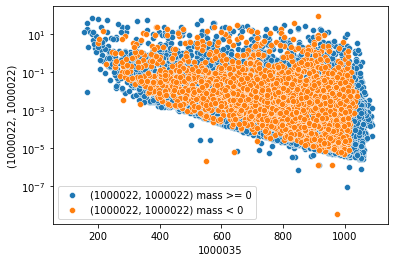

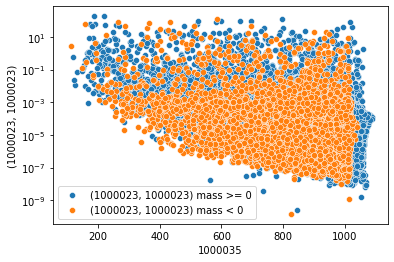

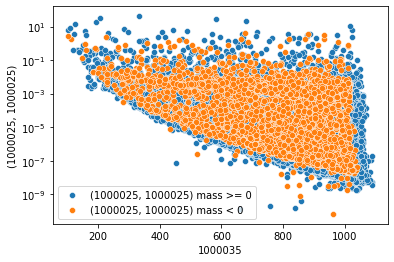

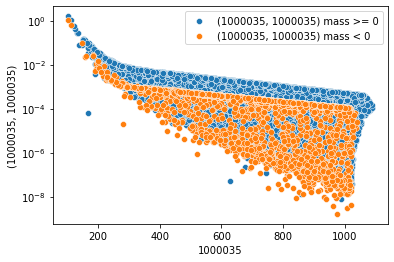

In [10]:
for process in processes:
    plt.figure()
    sns.scatterplot(x=mass.loc[idx_pos], y=df[process].loc[idx_pos], label=process + " mass >= 0")
    sns.scatterplot(x=np.abs(mass.loc[idx_neg]), y=df[process].loc[idx_neg], label=process + " mass < 0")
    
    plt.yscale("log")
plt.legend()

In [11]:
neutralinos = [
        "1000022",
        "1000023",
        "1000025",
        "1000035",
    ]  # neutralinos[i] = neutralino i.


df[processes] = np.log10(df[processes])


In [14]:
my_chart = alt.Chart(df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
).properties(
    width=120,
    height=120,
).repeat(
    row=processes,
    column=neutralinos,
)

#alt.renderers.enable('altair_saver', fmts=['vega-lite', 'pdf'])
altair_viewer.show(my_chart)
#my_chart.save("chart.png")

Displaying chart at http://localhost:20398/


In [298]:
print(alt.__version__)

4.1.0


In [197]:
source

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA
